In [159]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import random
import pickle
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import keras
import sys

In [179]:
encode_ = np.fromfile("encodeAE.bin",dtype=np.float32)

In [180]:
encode_ = encode_.reshape(551,2)

In [181]:
encode_

array([[-0.09321979, -0.00356511],
       [-0.09159892, -0.00228791],
       [-0.08766349, -0.00357849],
       ...,
       [-0.01690117, -0.00426668],
       [-0.01832988, -0.00740948],
       [-0.04579168, -0.02869646]], dtype=float32)

In [182]:
label_ = np.fromfile("label.bin",dtype = np.int64)

In [183]:
label_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

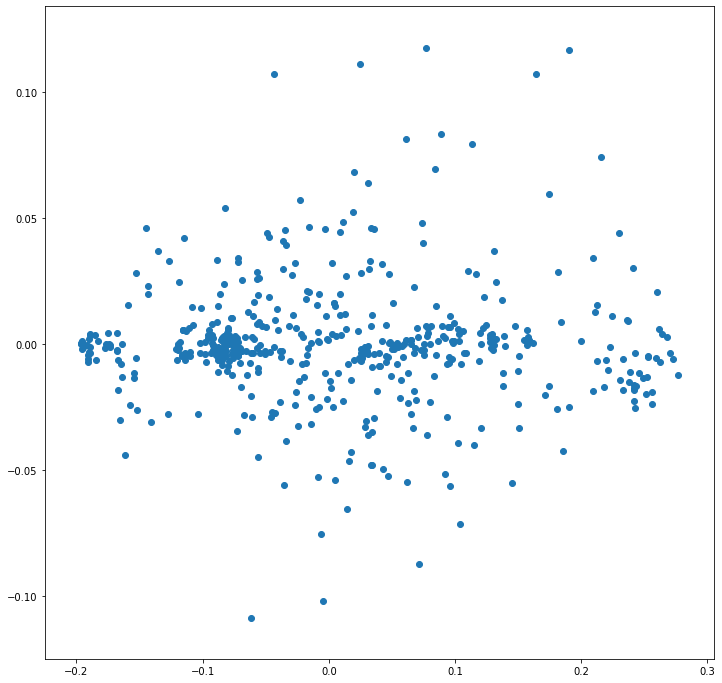

In [184]:
plt.figure(figsize=[12,12])
plt.scatter(x = [i[0] for i in encode_],y = [i[1] for i in encode_])

(551,)


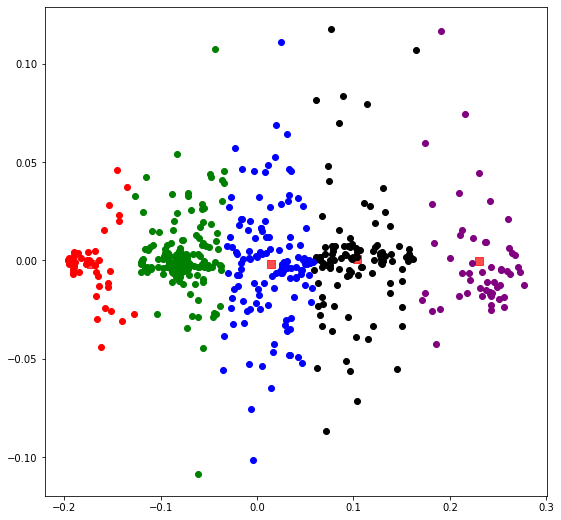

In [185]:
plt.figure(figsize=[9,9])
km5 = KMeans(n_clusters=5, init='random',max_iter=300,n_init=10,random_state=0)
encode_means = km5.fit_predict(encode_)
print(np.array(encode_means).shape)
plt.plot(encode_[encode_means==0,0],encode_[encode_means==0,1],'o',color='black')
plt.plot(encode_[encode_means==1,0],encode_[encode_means==1,1],'o',color='red')
plt.plot(encode_[encode_means==2,0],encode_[encode_means==2,1],'o',color='blue')
plt.plot(encode_[encode_means==3,0],encode_[encode_means==3,1],'o',color='purple')
plt.plot(encode_[encode_means==4,0],encode_[encode_means==4,1],'o',color='green')
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=50,marker='s', c='red',
            alpha=0.7, label='Centroids')

In [186]:
def select_label(cluster_set , cluster_center):
    minimun = 100
    distance = np.sqrt(np.sum(np.square(cluster_set[i] , cluster_center)))

In [187]:
mini = np.zeros((5), dtype=np.float)
mini_coodinate = np.zeros((5,2), dtype=np.float)

In [188]:
mini = [100,100,100,100,100]
count = 0
for j in range(5):
    for i in range(len(encode_[encode_means==j])):
            if(mini[j] >(np.sqrt(np.sum(np.square(encode_[encode_means==j][i] - [km5.cluster_centers_[j,0],km5.cluster_centers_[j,1]] ))))):
                mini[j] = (np.sqrt(np.sum(np.square(encode_[encode_means==j][i] - [km5.cluster_centers_[j,0],km5.cluster_centers_[j,1]] ))))
                mini_coodinate[j] = encode_[encode_means==j][i]

In [189]:
print(mini)
print(mini_coodinate)

[0.0006467938, 0.0015195219, 0.0061783683, 0.006281013, 0.00040847636]
[[ 0.10347109  0.0014893 ]
 [-0.17354408 -0.00111267]
 [ 0.01556001 -0.00790521]
 [ 0.23345327 -0.00589438]
 [-0.08162735  0.0010629 ]]


In [190]:
cluster_fake = np.zeros(5,)

In [191]:
print(len(encode_))

551


In [192]:
# plt.scatter(x = [i[0] for i in encode_],y = [i[1] for i in encode_])
for j in range(5):
    for i in range(len(encode_)):
        if(mini_coodinate[j][0] == encode_[i][0]):
            print(i)
            print(label_[i])
            cluster_fake[j] = label_[i]

218
4
282
4
538
4
404
4
446
0


In [193]:
cluster_fake

array([4., 4., 4., 4., 0.])

In [194]:
label_fake = np.zeros(551,)

In [195]:
for i in range(5):
    label_fake[encode_means==i] =cluster_fake[i]

In [196]:
print(label_fake)
print(label_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 0. 0. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 0. 4. 4. 4. 4. 4. 4. 4. 0. 4. 0. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 4. 4. 0. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 0. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 0. 0. 4. 4. 4. 4. 4. 4. 4. 0. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 0. 0. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 0. 0. 0. 4. 0.

In [197]:
count = 0
for i in range(len(label_)):
    if(label_fake[i] == label_[i]):
        count = count+1
print(count)
print('accuracy for unsupervised model is : {}'.format(count/551))

391
accuracy for unsupervised model is : 0.7096188747731398


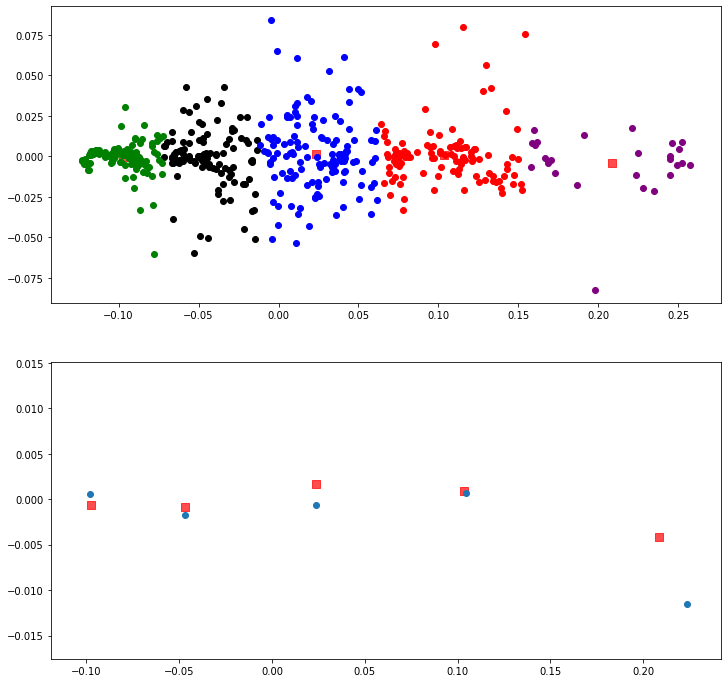

In [117]:
plt.figure(figsize=[12,12])
plt.subplot(2,1,1)
plt.plot(encode_[encode_means==0,0],encode_[encode_means==0,1],'o',color='black')
plt.plot(encode_[encode_means==1,0],encode_[encode_means==1,1],'o',color='red')
plt.plot(encode_[encode_means==2,0],encode_[encode_means==2,1],'o',color='blue')
plt.plot(encode_[encode_means==3,0],encode_[encode_means==3,1],'o',color='purple')
plt.plot(encode_[encode_means==4,0],encode_[encode_means==4,1],'o',color='green')
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=50,marker='s', c='red',
            alpha=0.7, label='Centroids')
plt.subplot(2,1,2)
plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=50,marker='s', c='red',
            alpha=0.7, label='Centroids')
plt.scatter(x = [i[0] for i in mini_coodinate],y = [i[1] for i in mini_coodinate])

In [16]:
[km5.cluster_centers_[0,0],km5.cluster_centers_[0,1]]

[-0.038847744, 0.025908684]

array([-0.04933017,  0.00763966], dtype=float32)

In [21]:
encode_[encode_means==i]

array([[-0.02843802, -0.00643881],
       [-0.04387897, -0.02553901],
       [ 0.01731613, -0.04397215],
       [-0.0254682 , -0.03274206],
       [-0.01336605,  0.00233423],
       [ 0.0165025 , -0.0121589 ],
       [-0.00962371, -0.00011291],
       [ 0.0172311 , -0.04004461],
       [-0.0186481 , -0.01630173],
       [-0.01354274, -0.02931713],
       [ 0.01219471,  0.00386861],
       [ 0.00026693, -0.00867917],
       [-0.00683315, -0.02202735]], dtype=float32)

In [20]:
for i in range(5):
    print(len(encode_[encode_means==i]))

14
20
38
25
13


In [24]:
for i in range(5):
    print(len(label_[label_==i]))

24
7
9
4
66


In [79]:
i= 0 
temp =np.zeros(10000)

In [102]:
temp[2] = count/551
temp

array([0.76950998, 0.8076225 , 0.        , ..., 0.        , 0.        ,
       0.        ])